In [1]:
import time

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from ultralytics import YOLO

from code_programm.path import get_path_weight_model


C:\Users\filip\AppData\Local\Temp\ipykernel_22280\1620853399.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name())

1
NVIDIA GeForce GTX 1080 Ti


In [3]:
model = YOLO(get_path_weight_model('best_v2_n.pt'))

# img = cv2.imread(r'C:\PycharmProjects\ETS_Autopilot\static\settings_cache\1708818146.3310258.png')
img = cv2.imread(r'C:\PycharmProjects\ETS_Autopilot\static\settings_cache\1708818112.041754.png')
results = model(img)


0: 512x512 3 markups, 2 markup_lines, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 383.0ms postprocess per image at shape (1, 3, 512, 512)


In [4]:
size = 512
combined_mask = np.zeros((size, size))

Время выполнения программы 0.009999990463256836


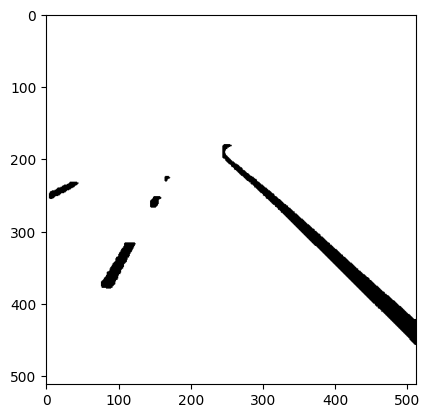

In [5]:

start_time = time.time()

# Создание пустого массива для хранения объединенных масок
# combined_mask = np.zeros((size, size))

# Перебор всех масок
for i in results[0].masks.data:
    # Добавление каждой маски к объединенному массиву
    combined_mask += i.cpu().numpy()

# Преобразование объединенного массива в тип uint8
# combined_mask.astype(np.uint8)

total_time = time.time() - start_time
print('Время выполнения программы', total_time)
# Сохранение объединенного массива в файл
plt.imshow(combined_mask, 'binary')

In [6]:
for i, ii in enumerate(combined_mask):
    for j, jj in enumerate(combined_mask[i]):
        if combined_mask[i][j] >= 0.25:
            combined_mask[i][j] -= 0.25

In [7]:
combined_mask[320][400]

0.0

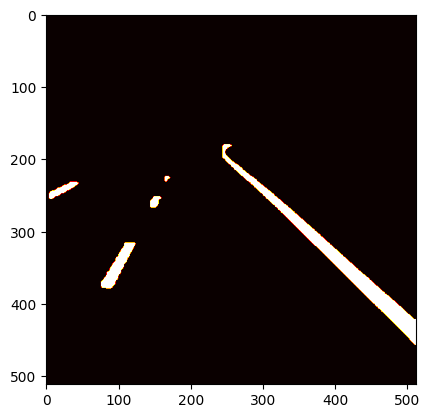

In [8]:
plt.imshow(combined_mask, 'hot')

In [11]:
size = 512
combined_mask = np.zeros((size, size))
model = YOLO(get_path_weight_model('best_v2_n.pt'))

# Загрузить видео
video_path = r'C:\PycharmProjects\ETS_Autopilot\static\settings_cache\cropped_video_3.mp4'
cap = cv2.VideoCapture(video_path)

# Зациклить по кадрам
while True:
    ret, frame = cap.read()
    results = model(frame, imgsz=512, conf=0.65, show=True, device='cuda')
    combined_mask -= combined_mask * 0.34

    if results[0].masks is not None:
        for i in results[0].masks.data:
            combined_mask += i.cpu().numpy()
    cv2.imshow('Video with Mask_no_plus', combined_mask)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

0: 512x512 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 (no detections), 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 (no detections), 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 (no detections), 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)
0: 512x512 (no detections), 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)
0: 512x512 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)
0: 512x512 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)
0: 512x512 (no detections), 7.0ms
Speed: 1.0ms preprocess, 7.0ms inference, 0.0ms pos

KeyboardInterrupt: 

In [ ]:
combined_mask

In [7]:
import pandas as pd

In [8]:
Wheel_ets = pd.DataFrame()